 <h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
  <h6 align="center">Labolatorium 2</h6>
 <h6 align="center"> Interpolacja</h6>
 

In [23]:
import numpy as np
from numpy import float32,power,float64
import matplotlib.pyplot as pyplot
import math
from scipy.interpolate import interp1d

<b>Zadanie 1</b><br> Interpolowanie wielomianu danego wzorem<br>


\begin{equation*}
f(x) = \frac{1}{1 + x^{2}}
\end{equation*}

\begin{equation*}
n = 5,10,15
\end{equation*}

z n + 1 węzłami równolgłymi w przedziale \[-5,5\] przez wielomian interpolacyjny p(x). Porównanie funkcji na wykresie, oraz wyliczenie i porównanie reszt interpoalacji e(x) = f(x) - p(x).

In [8]:
def func(x):
    return 1/(1 + x**2)

delta = -5
range_len = 10

<p>Do interpolacacji została wykorzystana macierz Vandermonda. Interpolacja przebiega w równo oddalonych od siebie punktach</p>

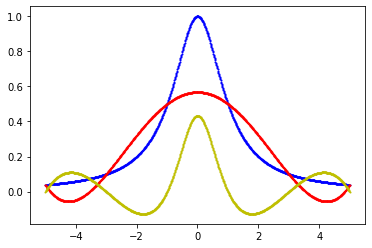

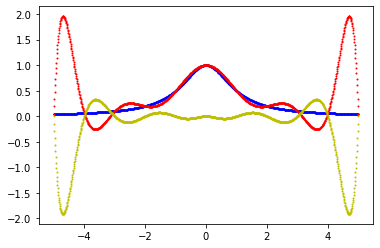

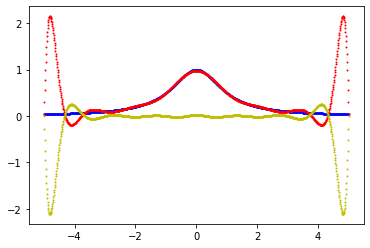

In [10]:
for n in [5,10,15]:
    x_point = delta
    y = []
    x = []
    while x_point<=5 :
        x.append(x_point)
        y.append(func(x_point))
        x_point = x_point + range_len/n

    x = np.array(x)
    y = np.array(y)
    van = np.vander(x,n+1,increasing = True)
    a = np.linalg.solve(van,y)
    x_axis = -5
    x_plot = []
    y_plot = []
    y_arx_plot = []
    delta_func = []
    while x_axis <= 5:
        x_plot.append(x_axis)
        y_plot.append(func(x_axis))
        val = 0
        for (i,r) in enumerate(a):
            val = val + r * (x_axis **i)

        y_arx_plot.append(val)
        delta_func.append(func(x_axis) - val)
        x_axis += 0.01
# 1ab
    pyplot.plot(x_plot,y_plot,'bo',markersize=1)
    pyplot.plot(x_plot,y_arx_plot,'ro',markersize=1)
    pyplot.plot(x_plot,delta_func,'yo',markersize=1)
    pyplot.show()

<b>Wnioski</b><br> <div style="color: red">Czerwona linia wielomian interpolowany p(x)</div><div style="color: blue">Niebieska linia oryginalny wielomian f(x)</div><div style="color: yellow; background-color: black;">Żółta linia reszta interpolacji e(x)</div> <p>Jak widać wielomian interpolacyjny odstaje na brzegach. Jest to tak zawany efekt Rungego czyli:
pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.</p><p>Takie zachowanie wielomianu jest typowe przy interpolacji za pomocą wielomianów wysokich stopni</p>

<b>Zadanie 2</b><br> Aby zniwelować efekt Runnego, dla danej funkcji i przedziału z zadania 1 będziemy szukać wielomianu interpolacyjnego w węzłąch Czebyszewa xk.<br>

\begin{equation*}
f(x) = \frac{1}{2}(a+b)+\frac{1}{2}(b-a)cos(\frac{ak-1}{2n}\pi)
\end{equation*}

k = 1,...,n<br>
a,b są odpowiednio początkiem i końcem przedziału interpolacji.

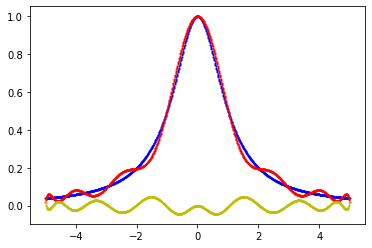

In [11]:
n = 15
start = -5
end = 5
czybyszew_points = []
for k in range(1,n+1):
    czybyszew = 0.5*(start + end) + 0.5*(end - start)*math.cos(((2*k-1)/(2*n))*math.pi)
    czybyszew_points.append(czybyszew)

delta = -5
range_len = 10


y = []
x = []
for (i,c) in enumerate(czybyszew_points):
    x.append(c)
    y.append(func(c))

x = np.array(x)
y = np.array(y)
van = np.vander(x,n,increasing = True)
a = np.linalg.solve(van,y)
x_axis = -5
x_plot = []
y_plot = []
y_arx_plot = []
delta_func = []
while x_axis <= 5:
    x_plot.append(x_axis)
    y_plot.append(func(x_axis))
    val = 0
    for (i,r) in enumerate(a):
        val = val + r * (x_axis **i)

    y_arx_plot.append(val)
    delta_func.append(func(x_axis) - val)
    x_axis += 0.01

pyplot.plot(x_plot,y_plot,'bo',markersize=1)
pyplot.plot(x_plot,y_arx_plot,'ro',markersize=1)
pyplot.plot(x_plot,delta_func,'yo',markersize=1)
pyplot.show()

<p><b>Wnioski</b><br>Jak widać na wykresie powyżej (reprezencjtacja funkcji jak w zadaniu 1).<br>Efekt Runnego zmniejszył się co można zaobserwowac po wykresie funkcji e(x). Fakt, że miejsca zerowe wielomianów Czebyszewa zagęszczają się ku krańcom przedziału, pozwala lepiej związać wielomian zapobiegając naturalnym dla wielomianów wysokiego rzędu oscylacjom.</p>

<b>Zadanie 3 Interpolacja krzywych funkcjami sklejanymi</b><br>Mamy daną elipsę w postaci parametrycznej<br>
\begin{equation*}
\left\{\begin{matrix}x = a*cos(t)
\\y = b*sin(t)
\end{matrix}\right.
\end{equation*}


\begin{equation*}
t \in [0,2\pi]
\end{equation*}<br>
Wykonujemy jej interpolacje sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości t. Interpolację wykonujemy osobno dla zbiorów punktów (t,x) oraz (t,y), a następnie rysujemy przybliżenie powyższej elipsy używając wyznaczonych funkcji dla 30 punktów.

In [14]:
a = 5
b = 1
def x_func(t):
    return a*math.cos(t)

def y_func(t):
    return b*math.sin(t)

Funkcje zadane parametrycznie

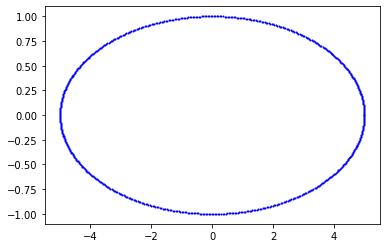

In [20]:
x = []
y = []
t = 0
while t <= 2*math.pi:
    x.append(x_func(t))
    y.append(y_func(t))
    t += 0.01

pyplot.plot(x,y,'bo',markersize=1)
pyplot.show()

Kształt oryginalnej elipsy.

In [24]:
def cube_spline_interpolate_elipse(n):
    r = np.linspace(0,2*math.pi,n)
    sx = interp1d(r,list(map(x_func,r)),kind='cubic')
    sy = interp1d(r,list(map(y_func,r)),kind='cubic')
    x = []
    y = []
    for t in np.linspace(0, 2 * np.pi, 1000):
        x.append(sx(t))
        y.append(sy(t))
    pyplot.plot(x,y,'bo',markersize=1)
    pyplot.show()

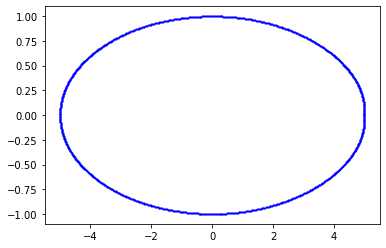

In [25]:
cube_spline_interpolate_elipse(10)


Dla 10 punktów funkcja praktycznie się nie różni od oryginału, oprócz widocznego na prawo spłaszczenia w okolicach punktu (0,4)

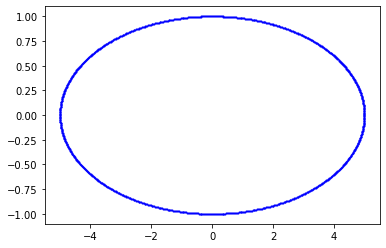

In [26]:
cube_spline_interpolate_elipse(30)


Dla 30 punktów już nie widać różnicy, jest to bardzo dobre przybliżenie elipsy

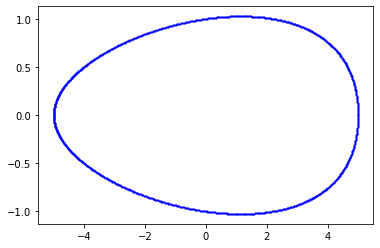

In [29]:
cube_spline_interpolate_elipse(5)

Aby zoabczyć różnice wykonałem interpolacje dla 5 punktów, tutaj wyraźnie można zauważyć jajkowaty krztałt nie przypominający elipsy.

<p><b>Wnioski</b><br>Jak widać  interpolacja sześciennymi funkcjami sklejanymi jest bardzo dobrym nażędziem do przybliżania wartości funkcji</p>